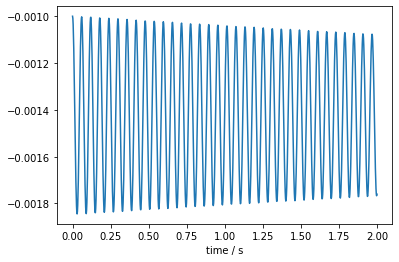

In [21]:
import numpy as np
import pylab as plt
from scipy.integrate import solve_ivp



def f(t, y):

  N, T, vz, h = y

  p = N*R*T/(h*A)
 
# v = K*np.sqrt(p-p_atm)  
# In the lecture, I forgot to take into account the possibility that the pressure
# of the gas in the cylinder might be lower than that of the surrounding atmosphere,
# which would cause air to enter the cylinder.  I have now taken this into account
# by checking for this situation and then setting the sign of the air leak velocity 
# v to be negative.
  Delta_p = p-p_atm
  if (Delta_p >= 0.0):
    v = K*np.sqrt(Delta_p)  
  else:
    v = - K*np.sqrt(-Delta_p)  

  dydt = []

  dydt.append(-v*a*p/(R*T))
  dydt.append( (-(p_atm*A+m*g)*vz - v*a*p)/(N*CV)  )
  dydt.append( (p-p_atm)*A/m - g)
  dydt.append( vz )

  return dydt


m = 1e-1             # mass of the piston / kg
K = 1.0e-3           # leak coefficient
T_atm = 298.15       # temperature of the surrounding air / K
p_atm = 1.0e5        # pressure of the surrounding air / Pa
g = 9.81             # acceleration due to gravity
D = 0.10             # diameter of the cylinder / m
A = np.pi*D**2/4.0   # cross sectional area of the cylinder / m^2
a = 1.0e-3           # area of the leak / m^2
R = 8.314            # gas constant / J mol^{-1} K^{-1}
CV = 5.0/2.0 * R     # molar isochoric heat capacity of air / J mol^{-1} K^{-1}


p0 = p_atm + m*g/A   # initial pressure of air in the cylinder / Pa
h0 = 1               # initial height of the piston / m
T0 = T_atm           # initial temperature of the air in the cylinder
N0 = p0* h0*A/(R*T0) # initial number of moles of air in the cylinder
vz0 = -1.0e-3        # initial velocity of the piston / m s^{-1}


# y[0] = N        = moles of air in the cylinder
# y[1] = T        = absolute temperature of air in the cylinder
# y[1] = vz       = velocity of the piston
# y[3] = h        = height of the piston
y0 = [N0, T0, vz0, h0]

t_init = 0.0     # initial time / s
t_final = 2.0    # final time / s

sol = solve_ivp(f, (t_init, t_final), y0, t_eval=np.linspace(t_init, t_final, 1000))

#print(sol)

plt.plot(sol.t, sol.y[2])
plt.xlabel(r'time / s')
plt.show()
